In [14]:
import matplotlib.pyplot
import numpy

In [9]:
lengths = range(2, 15)
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
heatmaps = {}
for char in letters:
    heatmaps[char] = {}
    for length in lengths:
        heatmaps[char][length] = []
        for i in range(length):
            heatmaps[char][length].append(0)

with open("data/ouestfrance.tsv", "r", encoding="utf8") as file:
    for line in file.readlines():
        word = line.strip().split("\t")[0]
        for i, char in enumerate(word):
            heatmaps[char][len(word)][i] += 1

for char in letters:
    for length in lengths:
        total = sum(heatmaps[char][length])
        if total == 0:
            continue
        for i in range(length):
            heatmaps[char][length][i] /= total

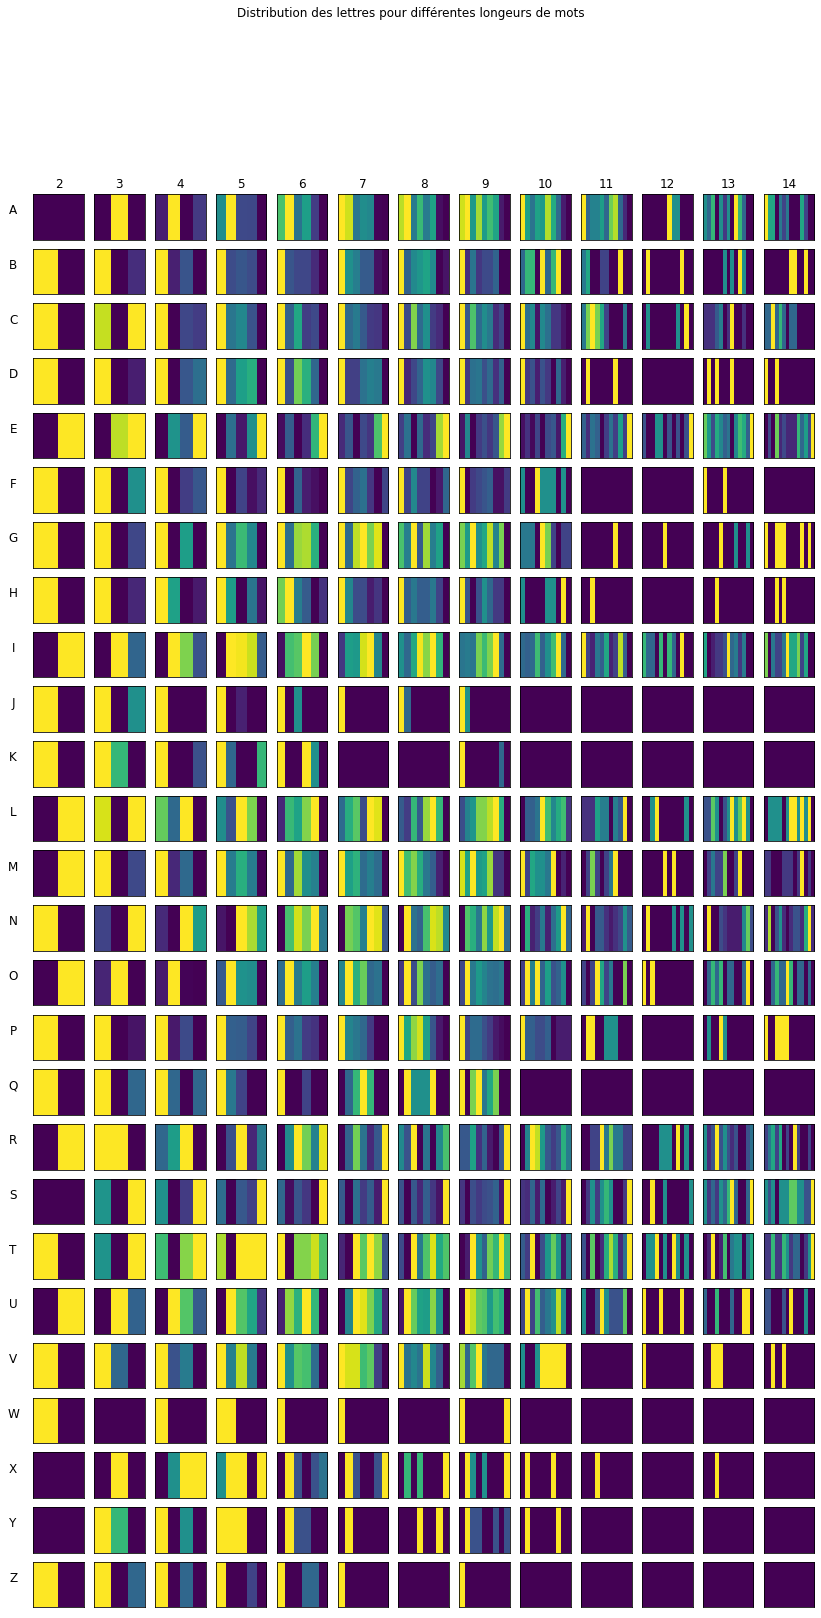

In [28]:
fig, axs = matplotlib.pyplot.subplots(
    nrows=len(letters),
    ncols=len(lengths),
    figsize=(14, 26)
)

matplotlib.pyplot.suptitle("Distribution des lettres pour différentes longeurs de mots")

for i, char in enumerate(letters):
    for j, length in enumerate(lengths):
        arr = numpy.array(heatmaps[char][length])
        arr = numpy.expand_dims(arr, axis=0)
        axs[i, j].imshow(arr, aspect="auto")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

for i, char in enumerate(letters):
    axs[i, 0].set_ylabel(char, rotation=0, size="large", labelpad=15)

for j, length in enumerate(lengths):
    axs[0, j].set_title(length)

matplotlib.pyplot.savefig("heatmap.png")